In [1]:
import numpy as np
from astropy.io import fits
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('tableau-colorblind10')
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle

In [2]:
#image_path = '/sps/lsst/groups/auxtel/data/raw_ncsa/'+obs_date+'/'
date = '20230316'
#image_path = '/sps/lsst/groups/auxtel/data/hack_usdf/my_postisrccd_img_forspectractor_2023/empty~holo4_003/{0}/empty-holo4_003/'.format(date)
image_path = '/pbs/throng/lsst/users/mrodrigu/my_postisrccd_img/{0}'.format(date)
image_label = 'exposure_{0}'.format(date)+'{0}_postisrccd.fits'
df_label = 'holosummary_{0}.csv'.format(date)
image_name = os.path.join(image_path,image_label)
df_name = os.path.join(image_path,df_label)
print(image_name)
print(df_name)

/pbs/throng/lsst/users/mrodrigu/my_postisrccd_img/20230316/exposure_20230316{0}_postisrccd.fits
/pbs/throng/lsst/users/mrodrigu/my_postisrccd_img/20230316/holosummary_20230316.csv


# Read data frame to obtain information about the exposures 

In [3]:
colnames = ["","id","obs_id","day_obs","seq_num","time_start","time_end","type","target","zenith_angle","expos","ra","dec","skyangle","science_program","jd","mjd"]

In [4]:
df = pd.read_csv(df_name, header=0, sep=',', usecols=np.arange(1,len(colnames)), names=colnames, index_col=False)

In [5]:
df

,id,obs_id,day_obs,seq_num,time_start,time_end,type,target,zenith_angle,expos,ra,dec,skyangle,science_program,jd,mjd
0,2023031600465,AT_O_20230316_000465,20230316,465,2023-03-17 06:21:17.961002,2023-03-17 06:21:48.203,science,HD185975,empty~holo4_003,60.572335,30.0,306.746064,-87.420358,339.962103,spec,2.460021e+06
1,2023031600466,AT_O_20230316_000466,20230316,466,2023-03-17 06:22:00.961010,2023-03-17 06:22:31.187,science,HD185975,empty~holo4_003,60.564685,30.0,306.745814,-87.420352,339.962194,spec,2.460021e+06
2,2023031600473,AT_O_20230316_000473,20230316,473,2023-03-17 06:27:18.678016,2023-03-17 06:27:48.917,science,HD73495,empty~holo4_003,61.662276,30.0,129.440720,-26.304083,201.720206,spec,2.460021e+06
3,2023031600474,AT_O_20230316_000474,20230316,474,2023-03-17 06:28:01.714998,2023-03-17 06:28:31.964,science,HD73495,empty~holo4_003,61.811732,30.0,129.440732,-26.304131,201.720052,spec,2.460021e+06
4,2023031600488,AT_O_20230316_000488,20230316,488,2023-03-17 06:41:22.129003,2023-03-17 06:41:52.366,science,HD111980,empty~holo4_003,15.228792,30.0,193.268446,-18.554949,234.010347,spec,2.460021e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2023031600723,AT_O_20230316_000723,20230316,723,2023-03-17 09:44:06.468003,2023-03-17 09:44:36.706,science,HD185975,empty~holo4_003,58.415402,30.0,307.791787,-87.427189,30.626692,spec,2.460021e+06
58,2023031600730,AT_O_20230316_000730,20230316,730,2023-03-17 09:49:04.678013,2023-03-17 09:49:34.919,science,HD167060,empty~holo4_003,34.978141,30.0,274.533339,-61.678254,52.744515,spec,2.460021e+06
59,2023031600731,AT_O_20230316_000731,20230316,731,2023-03-17 09:49:47.692988,2023-03-17 09:50:17.933,science,HD167060,empty~holo4_003,34.927126,30.0,274.533217,-61.678249,52.744603,spec,2.460021e+06
60,2023031600739,AT_O_20230316_000739,20230316,739,2023-03-17 09:55:12.796998,2023-03-17 09:55:43.041,science,HD146233,empty~holo4_003,23.344710,30.0,243.852365,-8.386274,252.272218,spec,2.460021e+06


In [6]:
seq_nums = np.array(df["seq_num"])
print(seq_nums)

[465 466 473 474 488 489 497 498 505 506 520 521 528 529 536 537 544 545
 553 554 561 562 569 570 577 578 589 590 597 598 608 609 616 617 624 625
 631 632 645 646 653 654 662 663 670 671 681 682 689 690 697 698 705 706
 713 714 722 723 730 731 739 740]


Organise pairs of exposures 

In [7]:
np.diff(seq_nums)
pairs = []
for i in range(len(seq_nums)-1):
    if seq_nums[i+1]-seq_nums[i]==1:
        pairs.append((seq_nums[i],seq_nums[i+1]))
pairs = np.array(pairs)

In [8]:
print(pairs)

[[465 466]
 [473 474]
 [488 489]
 [497 498]
 [505 506]
 [520 521]
 [528 529]
 [536 537]
 [544 545]
 [553 554]
 [561 562]
 [569 570]
 [577 578]
 [589 590]
 [597 598]
 [608 609]
 [616 617]
 [624 625]
 [631 632]
 [645 646]
 [653 654]
 [662 663]
 [670 671]
 [681 682]
 [689 690]
 [697 698]
 [705 706]
 [713 714]
 [722 723]
 [730 731]
 [739 740]]


# Check that things work for one spectrum 

In [9]:
ind0 = 473

In [10]:
f0 = fits.open(image_name.format(ind0))

In [11]:
f0[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CCD_MANU= 'ITL     '                                                            
CCD_TYPE= '3800C   '                                                            
BINX    = '1       '                                                            
BINY    = '1       '                                                            
CCDGAIN = '1.0     '                                                            
CCDNOISE= '10.0    '                                                            
CCDSLOT = 'S00     '                                                            
RAFTBAY = 'R00     '                                                            
FIRMWARE= '11384004'        

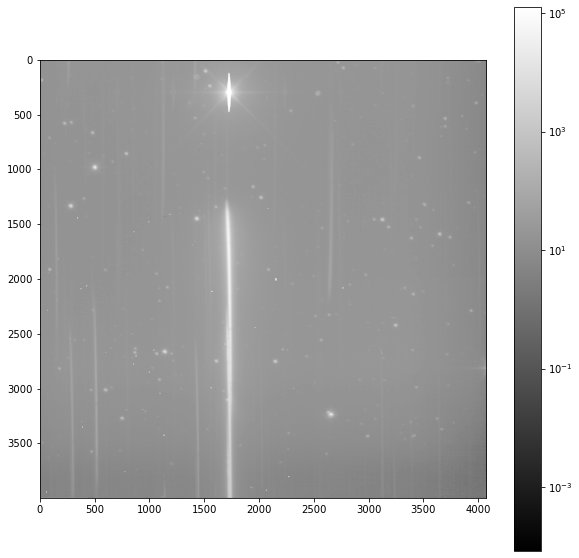

In [12]:
data0 = f0[1].data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(data0,cmap="gray",norm=LogNorm())
fig.colorbar(im,ax=ax)

In [13]:
print(data0.shape)

(4000, 4072)


# Ratio of two consecutive spectra 

In [14]:
ind1 = 681
ind2 = 682

f1 = fits.open(image_name.format(ind1))
f2 = fits.open(image_name.format(ind2))

spec1 = f1[1].data
spec2 = f2[1].data

Show ratio 

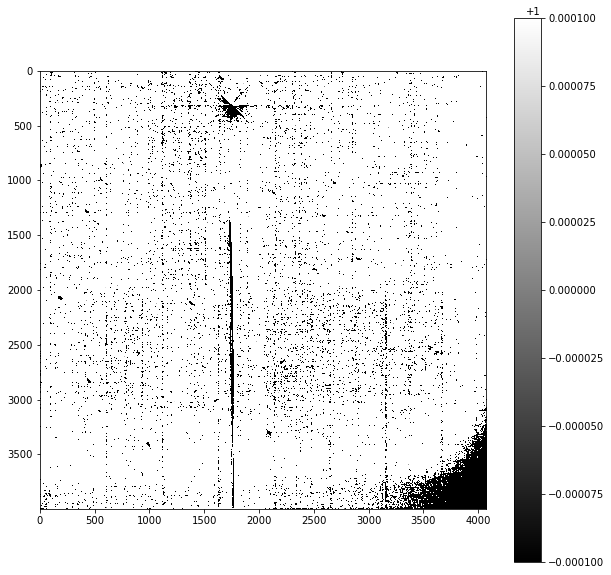

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(spec1/spec2,cmap="gray",vmin=0.9999,vmax=1.0001)#,norm=LogNorm())
fig.colorbar(im,ax=ax)

In [16]:
spec1_ = spec1[0:3000,2000:2500]
spec2_ = spec2[0:3000,2000:2500]

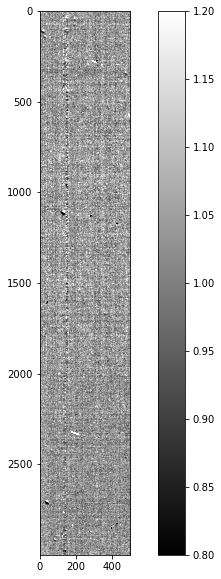

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(spec1_/spec2_,cmap="gray",vmin=0.8,vmax=1.2)#,norm=LogNorm())
fig.colorbar(im,ax=ax)

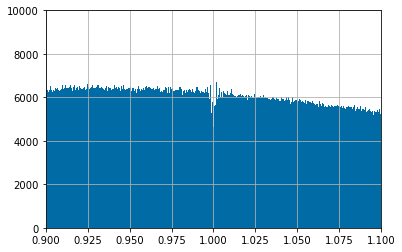

In [18]:
_ = plt.hist(spec1.ravel().astype('float')/spec2.ravel().astype('float'),range=(-0.5,2.50001),bins=10000)#,range=(0.8,1.2))
#plt.xscale("log")
#plt.yscale("log")
plt.xlim(0.9,1.1)
plt.ylim(0,10000)
plt.grid()

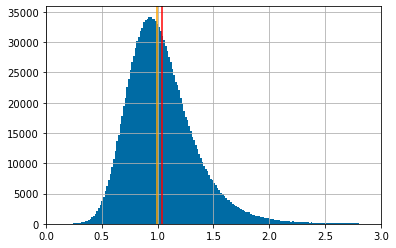

In [19]:
_ = plt.hist(spec1_.ravel()/spec2_.ravel(),range=(0.,3.),bins=200)#,range=(0.8,1.2))
plt.axvline(x=np.mean(spec1_.ravel()/spec2_.ravel()),color='r')
plt.axvline(x=np.median(spec1_.ravel()/spec2_.ravel()),color='orange')
#plt.xscale("log")
#plt.yscale("log")
plt.xlim(0,3.)
plt.grid()

In [20]:
print('Mean = ', np.mean(spec1_.ravel()/spec2_.ravel()))
print('Median = ', np.median(spec1_.ravel()/spec2_.ravel()))

Mean =  1.0399855
Median =  0.9958985


In [21]:
new_hdul = fits.HDUList()
hdu1 = fits.PrimaryHDU()
hdu2 = fits.ImageHDU()

hdu1.header = f0[0].header
hdu1.data = f0[0].data

hdu2.header = f0[1].header
hdu2.data = spec1/spec2

new_hdul.append(hdu1)
new_hdul.append(hdu2)


new_hdul.writeto('spectra_{0}_{1}_ratio_my_postisrccd.fits'.format(ind1,ind2), overwrite=True)


# Select zones to compute the mean and median on 

In [22]:
data0.shape

(4000, 4072)

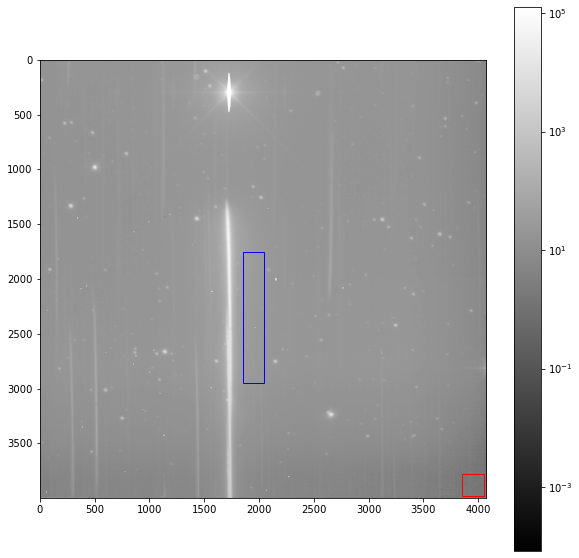

In [23]:
xside_shadow = 200
yside_shadow = 200

x0_shadow = data0.shape[1]-20-xside_shadow
y0_shadow = data0.shape[0]-20-yside_shadow

xside_light = 200
yside_light = 1200

x0_light = 1850
y0_light = 1750

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(data0,cmap="gray",norm=LogNorm())
ax.add_patch(Rectangle((x0_shadow,y0_shadow),xside_shadow,yside_shadow,color='r',alpha=1.,fill=None))
ax.add_patch(Rectangle((x0_light,y0_light),xside_light,yside_light,color='b',alpha=1.,fill=None))
fig.colorbar(im,ax=ax)

In [24]:
data0_ = data0[y0_light:y0_light+yside_light,x0_light:x0_light+xside_light]
print('Mean = ', np.mean(data0_.ravel()))
print('Median = ',np.median(data0_.ravel()))

Mean =  67.22062
Median =  65.534164


Iterate over pairs of exposures 

In [25]:
x_ = np.arange(len(pairs))
pair_means_light = []
pair_medians_light = []
pair_means_shadow = []
pair_medians_shadow = []

dict_means_light = {}
dict_medians_light = {}
dict_means_shadow = {}
dict_medians_shadow = {}

for p in pairs:
    #print(p)
    p = tuple(p)
    
    f1_ = fits.open(image_name.format(p[0]))
    f2_ = fits.open(image_name.format(p[1]))
    
    data1_light_ = f1_[1].data[y0_light:y0_light+yside_light,x0_light:x0_light+xside_light]
    data2_light_ = f2_[1].data[y0_light:y0_light+yside_light,x0_light:x0_light+xside_light]
    
    p1_mean_ = np.mean(data1_light_)
    p2_mean_ = np.mean(data2_light_)
    
    p1_median_ = np.median(data1_light_)
    p2_median_ = np.median(data2_light_)
    
    pair_means_light.append((p1_mean_,p2_mean_))
    pair_medians_light.append((p1_median_,p2_median_))
    
    dict_means_light[p] = (p1_mean_,p2_mean_)
    dict_medians_light[p] = (p1_median_,p2_median_)
    
    data1_shadow_ = f1_[1].data[y0_shadow:,x0_shadow:]
    data2_shadow_ = f2_[1].data[y0_shadow:,x0_shadow:]
    
    p1_mean_ = np.mean(data1_shadow_)
    p2_mean_ = np.mean(data2_shadow_)
    
    p1_median_ = np.median(data1_shadow_)
    p2_median_ = np.median(data2_shadow_)
    
    pair_means_shadow.append((p1_mean_,p2_mean_))
    pair_medians_shadow.append((p1_median_,p2_median_))
    
    dict_means_shadow[p] = (p1_mean_,p2_mean_)
    dict_medians_shadow[p] = (p1_median_,p2_median_)
    
    
pair_means_light = np.array(pair_means_light)
pair_medians_light = np.array(pair_medians_light)
pair_means_shadow = np.array(pair_means_shadow)
pair_medians_shadow = np.array(pair_medians_shadow)


In [26]:
pair_means_light[:,0]

array([ 44.763878,  67.22062 ,  27.232893,  64.72208 ,  45.86083 ,
        26.491768,  28.792198,  83.07942 ,  47.518425,  68.51247 ,
        36.43704 ,  31.859772,  31.437859,  48.912457,  42.257626,
        34.43072 ,  34.896915,  34.0086  ,  68.2673  ,  51.26942 ,
        39.375454,  70.015465,  36.155033,  52.182346,  41.699856,
        42.162678,  43.83266 ,  52.967262,  85.7433  , 109.00554 ,
       249.40218 ], dtype=float32)

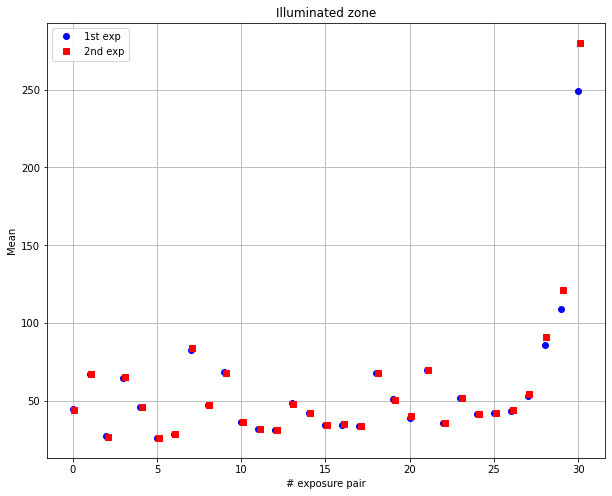

In [27]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(x_,pair_means_light[:,0],ls='',marker='o',color='b',label='1st exp')
ax.plot(x_+0.1,pair_means_light[:,1],ls='',marker='s',color='r',label='2nd exp')
ax.grid()
ax.set_xlabel('# exposure pair')
ax.set_ylabel('Mean')
ax.set_title('Illuminated zone')
ax.legend(loc="upper left")

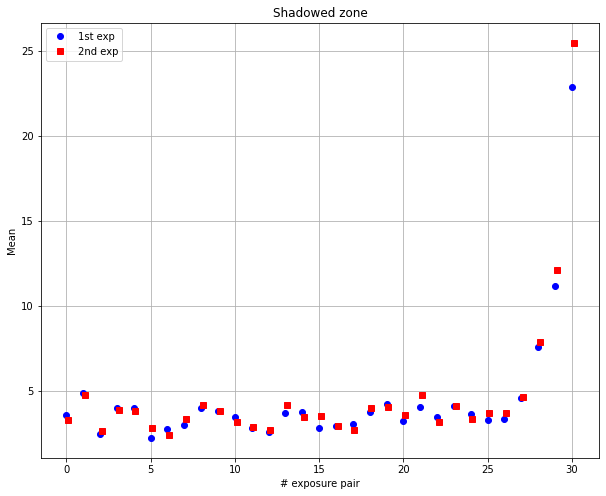

In [28]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(x_,pair_means_shadow[:,0],ls='',marker='o',color='b',label='1st exp')
ax.plot(x_+0.1,pair_means_shadow[:,1],ls='',marker='s',color='r',label='2nd exp')
ax.grid()
ax.set_xlabel('# exposure pair')
ax.set_ylabel('Mean')
ax.set_title('Shadowed zone')
ax.legend(loc="upper left")

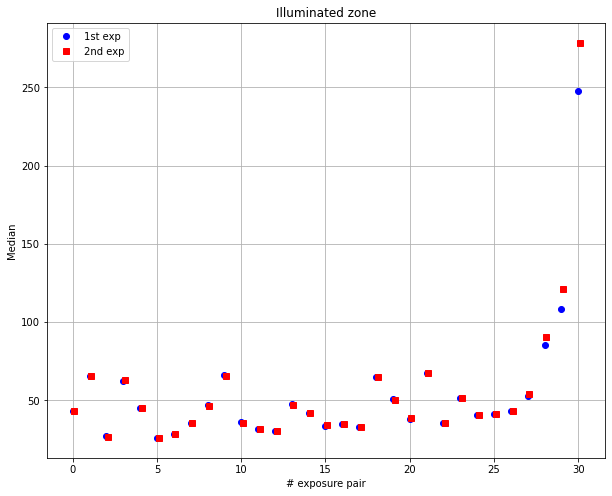

In [29]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(x_,pair_medians_light[:,0],ls='',marker='o',color='b',label='1st exp')
ax.plot(x_+0.1,pair_medians_light[:,1],ls='',marker='s',color='r',label='2nd exp')
ax.grid()
ax.set_xlabel('# exposure pair')
ax.set_ylabel('Median')
ax.set_title('Illuminated zone')
ax.legend(loc="upper left")

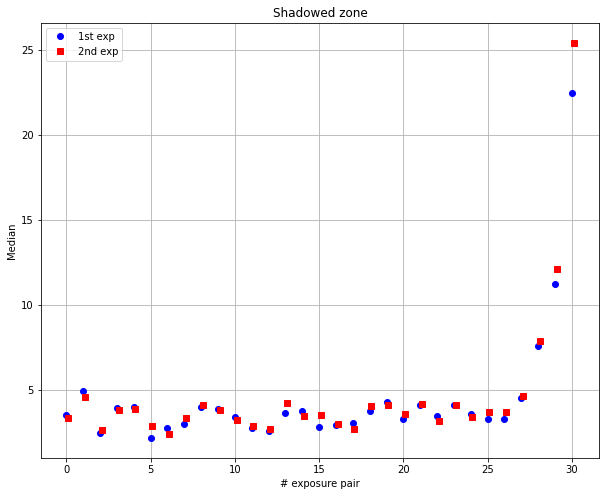

In [30]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(x_,pair_medians_shadow[:,0],ls='',marker='o',color='b',label='1st exp')
ax.plot(x_+0.1,pair_medians_shadow[:,1],ls='',marker='s',color='r',label='2nd exp')
#for p in pair_medians_shadow:
    #print(p)
    #ax.text(x_,p[0],'{0}-{1}'.format(p[0],p[1]),color='b',rotation=0,size=14)
ax.grid()
ax.set_xlabel('# exposure pair')
ax.set_ylabel('Median')
ax.set_title('Shadowed zone')
ax.legend(loc="upper left")

# Now we apply cuts to select the exposures 

We want to separate the exposures taken before the nautic twilight of the observation day and from the ones taken after 

In [31]:
date

'20230316'

Define the twilight time of the date 

In [32]:
twilight_hour = 9
twilight_minute = 23

In [33]:
year=int(date[0:4])
month_ = date[4:6]
if int(month_)<10:
    month = int(month_[1])
else:
    month = int(month_)
day=int(date[6:])+1
twilight = datetime.datetime(year=year,month=month,day=day,hour=twilight_hour,minute=twilight_minute)
print(twilight)

2023-03-17 09:23:00


Select exposure times 

In [34]:
obs_times_ = df["time_start"]

In [35]:
obs_times_[0]

'2023-03-17 06:21:17.961002'

In [36]:
time_mask = np.zeros(len(obs_times_)).astype('bool')
for i,t_ in enumerate(obs_times_):
    year_ = int(t_.split(' ')[0].split('-')[0])
    month_ = int(t_.split(' ')[0].split('-')[1])
    day_ = int(t_.split(' ')[0].split('-')[2])
    hour_ = int(t_.split(' ')[1].split(':')[0])
    minute_ = int(t_.split(' ')[1].split(':')[1])
    second_ = int(float(t_.split(' ')[1].split(':')[2]))
    
    time_ = datetime.datetime(year=year_,month=month_,day=day_,hour=hour_,minute=minute_,second=second_)
    
    #print(time_,twilight,time_<twilight)
    if time_<twilight:
        time_mask[i] = True
    

Take a sub dataframe from the original one based on the time of the exposures 

In [37]:
df_time = df[time_mask]
obs_times_ = np.array(obs_times_[time_mask])

In [38]:
obs_times = []
for i in range(int(len(obs_times_)/2)):
    hour_ = obs_times_[2*i].split(' ')[1].split(':')[0]
    minute_ = obs_times_[2*i].split(' ')[1].split(':')[1]
    second_ = int(float(obs_times_[2*i].split(' ')[1].split(':')[2]))
    if second_<10:
        second_ = '0{0}'.format(second_)
    obs_times.append('{0}:{1}:{2}'.format(hour_,minute_,second_))
obs_times = np.array(obs_times)

In [39]:
obs_times

array(['06:21:17', '06:27:18', '06:41:22', '06:47:02', '06:52:28',
       '07:05:46', '07:11:38', '07:21:43', '07:27:14', '07:34:02',
       '07:38:27', '07:43:52', '07:48:29', '08:00:15', '08:06:02',
       '08:16:00', '08:21:19', '08:25:50', '08:33:08', '08:44:13',
       '08:49:56', '08:55:43', '09:00:14', '09:17:43'], dtype='<U8')

Reevaluate the pairs after selecting exposures based on observing time 

In [40]:
seq_nums_t = np.array(df_time["seq_num"])
print(seq_nums_t)
np.diff(seq_nums_t)
pairs_t = []
for i in range(len(seq_nums_t)-1):
    if seq_nums_t[i+1]-seq_nums_t[i]==1:
        pairs_t.append((seq_nums_t[i],seq_nums_t[i+1]))
pairs_t = np.array(pairs_t)

[465 466 473 474 488 489 497 498 505 506 520 521 528 529 536 537 544 545
 553 554 561 562 569 570 577 578 589 590 597 598 608 609 616 617 624 625
 631 632 645 646 653 654 662 663 670 671 681 682]


In [41]:
x_t = np.arange(len(pairs_t))

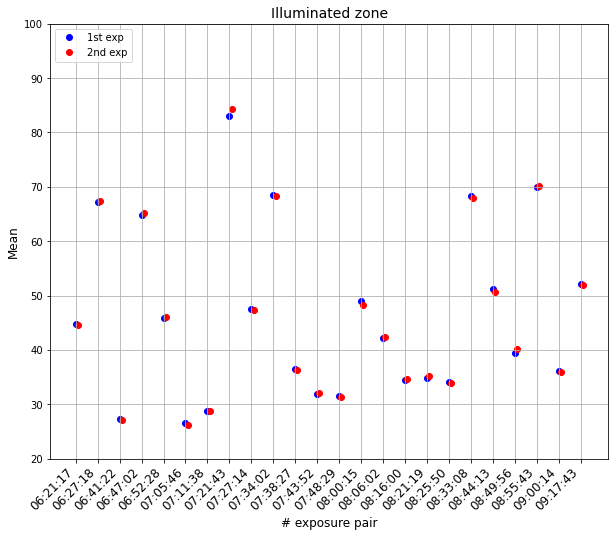

In [42]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

for i,p_ in enumerate(pairs_t):
    p_ = tuple(p_)
    
    ax.scatter(x_t[i],dict_means_light[p_][0],marker='o',color='b')
    ax.scatter(x_t[i]+0.1,dict_means_light[p_][1],marker='o',color='r')

ax.plot([],[],ls='',marker='o',color='b',label='1st exp')
ax.plot([],[],ls='',marker='o',color='r',label='2nd exp')
ax.set_ylim(20.,100.)
ax.grid()
ax.set_xlabel('# exposure pair',fontsize=12)
ax.set_ylabel('Mean',fontsize=12)
ax.set_xticks(ticks=x_t)
ax.set_xticklabels(labels=obs_times,rotation=45.,ha='right',fontsize=12)
ax.set_title('Illuminated zone',fontsize=14)
ax.legend(loc="upper left")

# Now we differentiate between sources 

In [43]:
sources = np.unique(np.array(df_time["target"]))
print(sources)

['HD111980' 'HD115169' 'HD142331' 'HD146233' 'HD167060' 'HD185975'
 'HD73495']


In [44]:
for s in sources:
    print(s,len(df_time["target"][df_time["target"]==s]))
    print(df_time["seq_num"][df_time["target"]==s])

HD111980 8
4     488
5     489
12    528
13    529
22    569
23    570
32    616
33    617
Name: seq_num, dtype: int64
HD115169 6
10    520
11    521
24    577
25    578
34    624
35    625
Name: seq_num, dtype: int64
HD142331 8
14    536
15    537
20    561
21    562
30    608
31    609
44    670
45    671
Name: seq_num, dtype: int64
HD146233 8
6     497
7     498
18    553
19    554
36    631
37    632
42    662
43    663
Name: seq_num, dtype: int64
HD167060 4
28    597
29    598
40    653
41    654
Name: seq_num, dtype: int64
HD185975 12
0     465
1     466
8     505
9     506
16    544
17    545
26    589
27    590
38    645
39    646
46    681
47    682
Name: seq_num, dtype: int64
HD73495 2
2    473
3    474
Name: seq_num, dtype: int64


HD111980
HD115169
HD142331
HD146233
HD167060
HD185975
HD73495


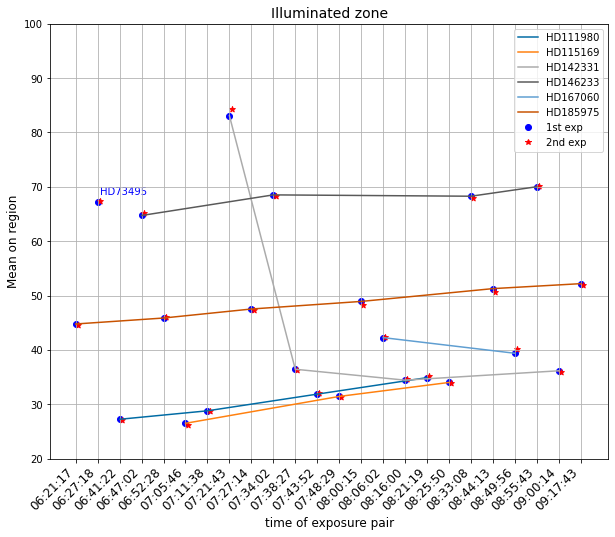

In [45]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

for source in sources:
    print(source)
    
    svec_ = np.array(df_time["target"])
    source_mask = svec_==source
    source_mask_ = []
    for sm in range(int(len(source_mask)/2)):
        source_mask_.append(source_mask[2*sm])
    source_mask_ = np.array(source_mask_)
    
    seq_nums_ts = np.array(df_time[source_mask]["seq_num"])
    np.diff(seq_nums_t)
    pairs_ts = []
    for i in range(len(seq_nums_ts)-1):
        if seq_nums_ts[i+1]-seq_nums_ts[i]==1:
            pairs_ts.append((seq_nums_ts[i],seq_nums_ts[i+1]))
    pairs_ts = np.array(pairs_ts)
    
    obs_timess = obs_times[source_mask_]
    
    x_ts = x_t[source_mask_]
    
    mean_1 = []
    mean_2 = []
    for i,p_ in enumerate(pairs_ts):
        p_ = tuple(p_)
        
        ax.scatter(x_ts[i],dict_means_light[p_][0],marker='o',color='b')
        ax.scatter(x_ts[i]+0.1,dict_means_light[p_][1],marker='*',color='r')
        
        mean_1.append(dict_means_light[p_][0])
        mean_2.append(dict_means_light[p_][1])
    mean_1 = np.array(mean_1)
    mean_2 = np.array(mean_2)
    
    if len(mean_1)>1:
        ax.plot(x_ts,mean_1,ls='-',marker='',alpha=1.0,label=source)
    else:
        ax.text(x_ts+0.1,mean_1+mean_1*0.02,source,color='b',zorder=-1)
    
ax.plot([],[],ls='',marker='o',color='b',label='1st exp')
ax.plot([],[],ls='',marker='*',color='r',label='2nd exp')
ax.set_ylim(20.,100.)
ax.grid()
ax.set_xlabel('time of exposure pair',fontsize=12)
ax.set_ylabel('Mean on region',fontsize=12)
ax.set_xticks(ticks=x_t)
ax.set_xticklabels(labels=obs_times,rotation=45.,ha='right',fontsize=12)
ax.set_title('Illuminated zone',fontsize=14)
ax.legend(loc="best")




HD111980
HD115169
HD142331
HD146233
HD167060
HD185975
HD73495


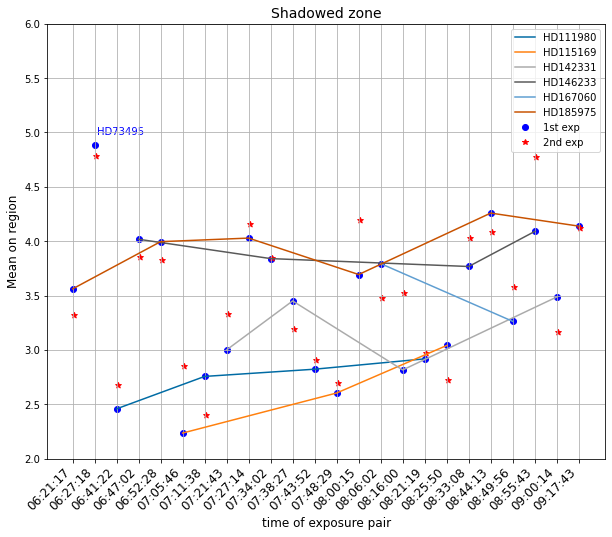

In [46]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

for source in sources:
    print(source)
    
    svec_ = np.array(df_time["target"])
    source_mask = svec_==source
    source_mask_ = []
    for sm in range(int(len(source_mask)/2)):
        source_mask_.append(source_mask[2*sm])
    source_mask_ = np.array(source_mask_)
    
    seq_nums_ts = np.array(df_time[source_mask]["seq_num"])
    np.diff(seq_nums_t)
    pairs_ts = []
    for i in range(len(seq_nums_ts)-1):
        if seq_nums_ts[i+1]-seq_nums_ts[i]==1:
            pairs_ts.append((seq_nums_ts[i],seq_nums_ts[i+1]))
    pairs_ts = np.array(pairs_ts)
    
    obs_timess = obs_times[source_mask_]
    
    x_ts = x_t[source_mask_]
    
    mean_1 = []
    mean_2 = []
    for i,p_ in enumerate(pairs_ts):
        p_ = tuple(p_)
        
        ax.scatter(x_ts[i],dict_means_shadow[p_][0],marker='o',color='b')
        ax.scatter(x_ts[i]+0.05,dict_means_shadow[p_][1],marker='*',color='r')
        
        mean_1.append(dict_means_shadow[p_][0])
        mean_2.append(dict_means_shadow[p_][1])
    mean_1 = np.array(mean_1)
    mean_2 = np.array(mean_2)
    
    if len(mean_1)>1:
        ax.plot(x_ts,mean_1,ls='-',marker='',alpha=1.0,label=source)
    else:
        ax.text(x_ts+0.1,mean_1+mean_1*0.02,source,color='b',zorder=-1)
    
ax.plot([],[],ls='',marker='o',color='b',label='1st exp')
ax.plot([],[],ls='',marker='*',color='r',label='2nd exp')
ax.set_ylim(2.,6.)
ax.grid()
ax.set_xlabel('time of exposure pair',fontsize=12)
ax.set_ylabel('Mean on region',fontsize=12)
ax.set_xticks(ticks=x_t)
ax.set_xticklabels(labels=obs_times,rotation=45.,ha='right',fontsize=12)
ax.set_title('Shadowed zone',fontsize=14)
ax.legend(loc="best")



HD111980
HD115169
HD142331
HD146233
HD167060
HD185975
HD73495


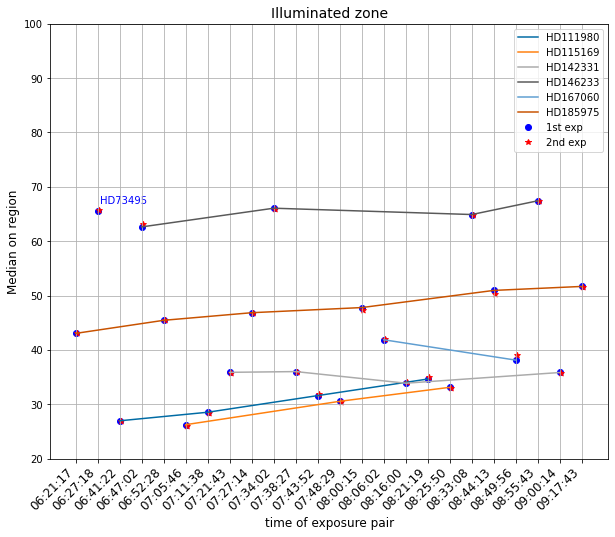

In [47]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

for source in sources:
    print(source)
    
    svec_ = np.array(df_time["target"])
    source_mask = svec_==source
    source_mask_ = []
    for sm in range(int(len(source_mask)/2)):
        source_mask_.append(source_mask[2*sm])
    source_mask_ = np.array(source_mask_)
    
    seq_nums_ts = np.array(df_time[source_mask]["seq_num"])
    np.diff(seq_nums_t)
    pairs_ts = []
    for i in range(len(seq_nums_ts)-1):
        if seq_nums_ts[i+1]-seq_nums_ts[i]==1:
            pairs_ts.append((seq_nums_ts[i],seq_nums_ts[i+1]))
    pairs_ts = np.array(pairs_ts)
    
    obs_timess = obs_times[source_mask_]
    
    x_ts = x_t[source_mask_]
    
    mean_1 = []
    mean_2 = []
    for i,p_ in enumerate(pairs_ts):
        p_ = tuple(p_)
        
        ax.scatter(x_ts[i],dict_medians_light[p_][0],marker='o',color='b')
        ax.scatter(x_ts[i]+0.05,dict_medians_light[p_][1],marker='*',color='r')
        
        mean_1.append(dict_medians_light[p_][0])
        mean_2.append(dict_medians_light[p_][1])
    mean_1 = np.array(mean_1)
    mean_2 = np.array(mean_2)
    
    if len(mean_1)>1:
        ax.plot(x_ts,mean_1,ls='-',marker='',alpha=1.0,label=source)
    else:
        ax.text(x_ts+0.1,mean_1+mean_1*0.02,source,color='b',zorder=-1)
    
ax.plot([],[],ls='',marker='o',color='b',label='1st exp')
ax.plot([],[],ls='',marker='*',color='r',label='2nd exp')
ax.set_ylim(20.,100.)
ax.grid()
ax.set_xlabel('time of exposure pair',fontsize=12)
ax.set_ylabel('Median on region',fontsize=12)
ax.set_xticks(ticks=x_t)
ax.set_xticklabels(labels=obs_times,rotation=45.,ha='right',fontsize=12)
ax.set_title('Illuminated zone',fontsize=14)
ax.legend(loc="best")




HD111980
HD115169
HD142331
HD146233
HD167060
HD185975
HD73495


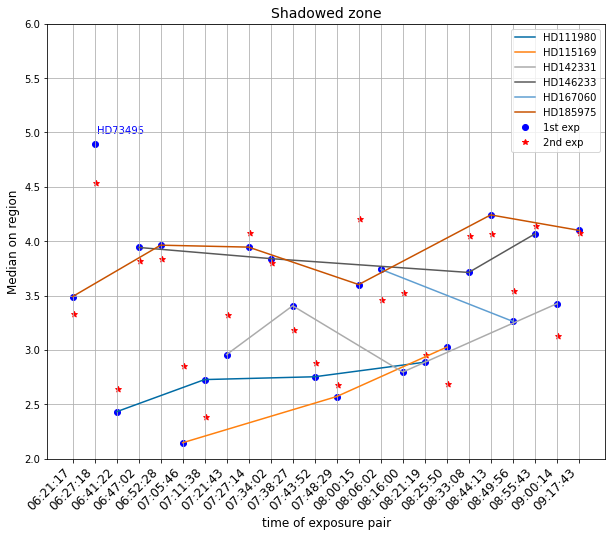

In [48]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

for source in sources:
    print(source)
    
    svec_ = np.array(df_time["target"])
    source_mask = svec_==source
    source_mask_ = []
    for sm in range(int(len(source_mask)/2)):
        source_mask_.append(source_mask[2*sm])
    source_mask_ = np.array(source_mask_)
    
    seq_nums_ts = np.array(df_time[source_mask]["seq_num"])
    np.diff(seq_nums_t)
    pairs_ts = []
    for i in range(len(seq_nums_ts)-1):
        if seq_nums_ts[i+1]-seq_nums_ts[i]==1:
            pairs_ts.append((seq_nums_ts[i],seq_nums_ts[i+1]))
    pairs_ts = np.array(pairs_ts)
    
    obs_timess = obs_times[source_mask_]
    
    x_ts = x_t[source_mask_]
    
    mean_1 = []
    mean_2 = []
    for i,p_ in enumerate(pairs_ts):
        p_ = tuple(p_)
        
        ax.scatter(x_ts[i],dict_medians_shadow[p_][0],marker='o',color='b')
        ax.scatter(x_ts[i]+0.05,dict_medians_shadow[p_][1],marker='*',color='r')
        
        mean_1.append(dict_medians_shadow[p_][0])
        mean_2.append(dict_medians_shadow[p_][1])
    mean_1 = np.array(mean_1)
    mean_2 = np.array(mean_2)
    
    if len(mean_1)>1:
        ax.plot(x_ts,mean_1,ls='-',marker='',alpha=1.0,label=source)
    else:
        ax.text(x_ts+0.1,mean_1+mean_1*0.02,source,color='b',zorder=-1)
    
ax.plot([],[],ls='',marker='o',color='b',label='1st exp')
ax.plot([],[],ls='',marker='*',color='r',label='2nd exp')
ax.set_ylim(2.,6.)
ax.grid()
ax.set_xlabel('time of exposure pair',fontsize=12)
ax.set_ylabel('Median on region',fontsize=12)
ax.set_xticks(ticks=x_t)
ax.set_xticklabels(labels=obs_times,rotation=45.,ha='right',fontsize=12)
ax.set_title('Shadowed zone',fontsize=14)
ax.legend(loc="best")

